In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import scipy as sc
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

In [3]:
data0D = pd.read_csv("./data/0D.csv")
data0E = pd.read_csv("./data/0E.csv")
data1D = pd.read_csv("./data/1D.csv")
data1E = pd.read_csv("./data/1E.csv")
data2D = pd.read_csv("./data/2D.csv")
data2E = pd.read_csv("./data/2E.csv")
data3D = pd.read_csv("./data/3D.csv")
data3E = pd.read_csv("./data/3E.csv")
data4D = pd.read_csv("./data/4D.csv")
data4E = pd.read_csv("./data/4E.csv")





## Skip Warm-up Phase of each Measurement

Each file contains a measured time series of samples (rotation speed, vibrations). Since the first about 10 seconds are noisy due to the warm-up phase of the measuring device, the first 50000 samples are skipped.   



In [4]:
skip=50000
data0D = data0D.iloc[skip:,:]
data1D = data0D.iloc[skip:,:]
data2D = data0D.iloc[skip:,:]
data3D = data0D.iloc[skip:,:]
data4D = data0D.iloc[skip:,:]

data0E = data0E.iloc[skip:,:]
data1E = data0E.iloc[skip:,:]
data2E = data0E.iloc[skip:,:]
data3E = data0E.iloc[skip:,:]
data4E = data4E.iloc[skip:,:]

## Inspect Datasets 0E and 4E

The following sections show the internal structure of the dataset: The first column contains the input voltage (in V) to the motor controller, the second column contains the measured speed of rotation (in RPM). Columns 3 to 5 contain the signals from the three vibration sensors.

In [5]:
data0E

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
50000,4.0,1026.9841,0.020367,0.033482,0.026215
50001,4.0,1026.9841,0.019192,0.034207,0.026509
50002,4.0,1026.9841,0.016861,0.033402,0.026835
50003,4.0,1026.9841,0.017999,0.033278,0.026187
50004,4.0,1026.9841,0.019349,0.034159,0.025806
...,...,...,...,...,...
6893562,8.1,1959.3277,0.000098,0.000602,0.003182
6893563,8.1,1959.3277,0.000110,0.000299,0.004029
6893564,8.1,1959.3277,0.000626,0.000457,0.003378
6893565,8.1,1959.3277,0.001309,0.000594,0.003142


In [7]:
data0E.describe()

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
count,6.843567e+06,6.843567e+06,6.843567e+06,6.843567e+06,6.843567e+06
mean,6.061296e+00,1.490888e+03,5.884835e-04,7.014949e-04,3.261529e-03
std,1.205810e+00,2.565084e+02,6.512743e-03,8.192315e-03,2.597875e-03
min,4.000000e+00,1.025974e+03,-8.161068e-02,-1.398516e-01,-2.267003e-02
25%,5.000000e+00,1.273534e+03,-1.417399e-03,-1.353025e-03,2.033710e-03
50%,6.100000e+00,1.486869e+03,5.376339e-04,6.043911e-04,3.211498e-03
75%,7.100000e+00,1.710401e+03,2.691746e-03,2.683401e-03,4.520416e-03
max,8.100000e+00,1.959616e+03,8.706570e-02,1.345038e-01,2.895355e-02


In [8]:
data4E

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
50000,4.0,1027.8549,0.011660,0.022202,0.018487
50001,4.0,1027.8549,0.023532,-0.014404,0.016562
50002,4.0,1027.8549,-0.000423,0.049901,0.017732
50003,4.0,1027.8549,-0.000499,0.057977,0.019388
50004,4.0,1027.8549,0.024875,0.009763,0.015419
...,...,...,...,...,...
6914042,4.0,1080.4582,0.002939,-0.003955,0.002704
6914043,4.0,1080.4582,-0.000345,0.002913,0.000757
6914044,4.0,1080.4582,-0.003408,0.002537,-0.001725
6914045,4.0,1080.4582,-0.004315,-0.002156,-0.000253


In [9]:
data4E.describe()

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
count,6.864047e+06,6.864047e+06,6.864047e+06,6.864047e+06,6.864047e+06
mean,6.055147e+00,1.492996e+03,6.847208e-04,6.238618e-04,2.814346e-03
std,1.209247e+00,2.578084e+02,1.476320e-02,1.838645e-02,7.703137e-03
min,4.000000e+00,1.027846e+03,-1.012993e-01,-2.115834e-01,-3.185988e-02
25%,5.000000e+00,1.271982e+03,-6.102324e-03,-6.538630e-03,-1.285076e-03
50%,6.100000e+00,1.487173e+03,5.400181e-04,5.018711e-04,2.655983e-03
75%,7.100000e+00,1.713392e+03,7.725954e-03,7.796287e-03,7.050037e-03
max,8.100000e+00,1.963769e+03,1.093101e-01,1.752233e-01,3.780127e-02


## Plot Measurement Datasets 0E and 4E

The timeseries were divided into windows, each corresponding to one second or 4096 values. The following diagrams show two measurements (timeseries): a) no unbalance, b) largest unbalance. 

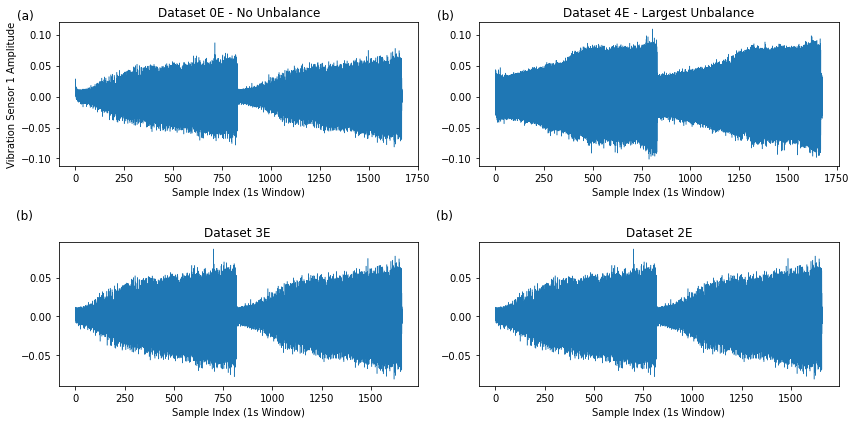

In [20]:
# Create the figure and subplots
fig = plt.figure(figsize=(12, 6))

# Plot for Dataset 0E - No Unbalance
ax1 = plt.subplot2grid((4, 4), (0, 0), colspan=2, rowspan=2, title="Dataset 0E - No Unbalance")
ax1.plot(np.arange(len(data0E['Vibration_1'].values))/4096, data0E['Vibration_1'].values, lw=0.5)
ax1.set_xlabel("Sample Index (1s Window)")
ax1.set_ylabel("Vibration Sensor 1 Amplitude")
ax1.text(-300, 0.125, "(a)", fontsize=12)

# Plot for Dataset 4E - Largest Unbalance
ax2 = plt.subplot2grid((4, 4), (0, 2), colspan=2, rowspan=2, title="Dataset 4E - Largest Unbalance", sharey=ax1)
ax2.plot(np.arange(len(data4E['Vibration_1'].values))/4096, data4E['Vibration_1'].values, lw=0.5)
ax2.set_xlabel("Sample Index (1s Window)")
ax2.text(-300, 0.125, "(b)", fontsize=12)
# Plot for Dataset 3E 
ax3 = plt.subplot2grid((4, 4), (2, 0), colspan=2, rowspan=2, title="Dataset 3E ")
ax3.plot(np.arange(len(data3E['Vibration_1'].values))/4096, data3E['Vibration_1'].values, lw=0.5)
ax3.set_xlabel("Sample Index (1s Window)")
ax3.text(-300, 0.125, "(b)", fontsize=12)
# Plot for Dataset 2E 
ax4 = plt.subplot2grid((4, 4), (2, 2), colspan=2, rowspan=2, title="Dataset 2E", sharey=ax3)
ax4.plot(np.arange(len(data2E['Vibration_1'].values))/4096, data2E['Vibration_1'].values, lw=0.5)
ax4.set_xlabel("Sample Index (1s Window)")
ax4.text(-300, 0.125, "(b)", fontsize=12)


# Adjust the layout and save/show the figure
plt.tight_layout()
fig.savefig("./figures/Fig.4_ab.png", dpi=200)
plt.show()

## Preprocess Data Using FFT

For some classification approaches  certain preprocessing and feature extraction steps like Fast Fourier Transformation (FFT) are necessary. The following diagrams show the timeseries as well as the FFT-transformed signals for a range of different rotation speeds.

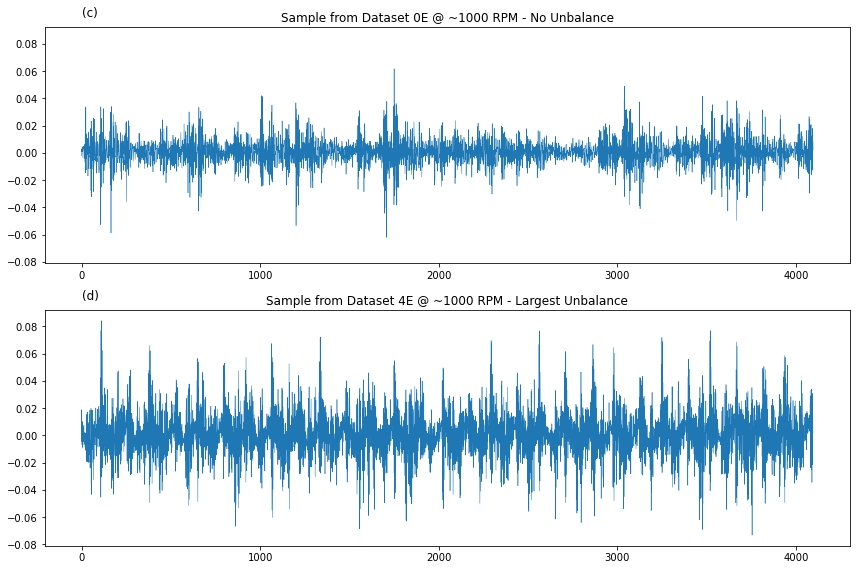

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=4, title="Sample from Dataset 0E @ ~1000 RPM - No Unbalance")
ax1.plot(np.arange(4096), data0E['Vibration_1'].loc[2950000:2950000+4095].values, lw=0.5)
ax1.text(0, 0.1,"(c)", fontsize=12)


ax2 = plt.subplot2grid((2, 4), (1, 0), colspan=4, title="Sample from Dataset 4E @ ~1000 RPM - Largest Unbalance",
                        sharex=ax1, sharey=ax1)
ax2.plot(np.arange(4096), data4E['Vibration_1'].loc[2950000:2950000+4095].values, lw=0.5)
ax2.text(0, 0.1,"(d)", fontsize=12)
plt.tight_layout()
fig.savefig("./figures/Fig.4_cd.png", dpi=200)
plt.show()

In [24]:
window = 4096

n = int(np.floor(len(data0E['Vibration_1'])/window))
X_0E = data0E['Vibration_1'][:int(n)*window].values.reshape((n, window))
n = int(np.floor(len(data4E['Vibration_1'])/window))
X_4E = data4E['Vibration_1'][:int(n)*window].values.reshape((n, window))

X_0E_fft = np.abs(np.fft.rfft(X_0E, axis=1))[:,:int(window/2)]
X_4E_fft = np.abs(np.fft.rfft(X_4E, axis=1))[:,:int(window/2)]
X_0E_fft[:,0]=0
X_4E_fft[:,0]=0

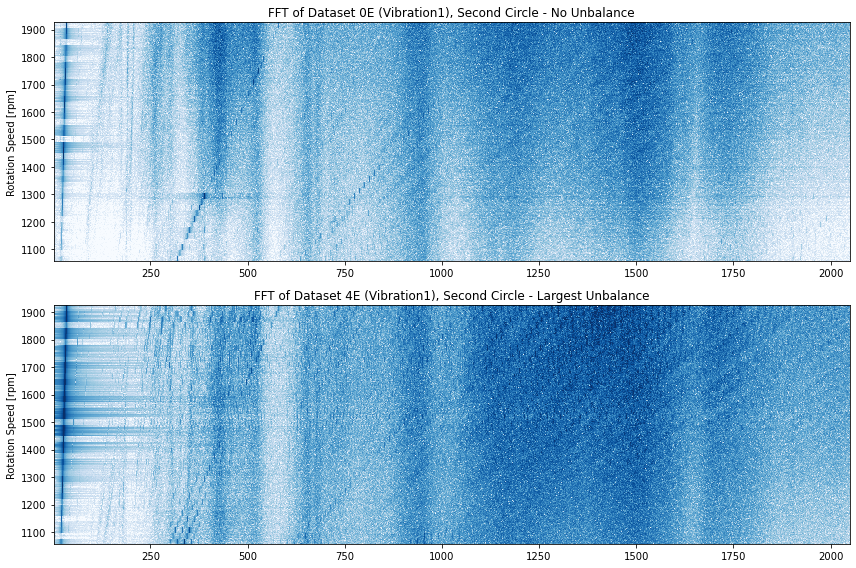

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=4, title="FFT of Dataset 0E (Vibration1), Second Circle - No Unbalance")
ax1.pcolorfast(np.arange(1,2050), np.linspace(1057.,1926.2,len(X_0E_fft[831:1670,:])), X_0E_fft[831:1670,:],
           cmap="Blues",norm=LogNorm(vmin=0.005, vmax=5.0))
ax1.set_ylabel("Rotation Speed [rpm]")
ax2 = plt.subplot2grid((2, 4), (1, 0), colspan=4, title="FFT of Dataset 4E (Vibration1), Second Circle - Largest Unbalance")
ax2.pcolorfast(np.arange(1,2050), np.linspace(1057.,1926.2,len(X_4E_fft[831:1670,:])), X_4E_fft[831:1670,:],
           cmap="Blues",norm=LogNorm(vmin=0.005, vmax=5.0))
ax2.set_ylabel("Rotation Speed [rpm]")
plt.tight_layout()
fig.savefig("./figures/Fig.4_ef.png", dpi=200)
plt.show()

## Approach 1: Fully-Connected Neural Network on FFT-transformed Data